In [1]:
#Importing Libraries
#Scientific Libraries
import numpy as np
import pandas as pd
#Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Import autoML Library Pycaret
from pycaret.classification import *
#warnings deactivation
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#Loading data sets
df_train = pd.read_csv('train.csv', index_col=0)
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.0,5.0,1.0,0.0,0.0,5,5,0,5,5,5,5,5.0,A,A,A,A,A,A,A,B,D
2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.0,0,23005157.0,2304707.0,Granja,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,A,A,A,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,1,1,1,1,1,NaN,A,A,C,A,B,A,A,C,A
3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,3,1,2304400.0,Fortaleza,23.0,CE,3,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,5,5,5,5,5,NaN,A,A,A,A,C,A,A,B,A
4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,0,1,3304557.0,Rio de Janeiro,33.0,RJ,1,9,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,A,B,B,B,A,B,A,B,C,A,B,D,B,C,B,C,F,C,2.0,0.0,5.0,5.0,5.0,5,5,5,5,2,5,5,5.0,C,A,A,A,A,D,A,A,A
5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,2,1,1505304.0,Oriximiná,15.0,PA,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,B,A,A,A,A,B,A,A,B,A,A,A,B,F,D,5.0,4.0,3.0,5.0,4.0,5,5,4,3,1,4,5,NaN,A,A,A,A,A,A,A,A,A


In [4]:
#Cheking datasets shape
print(df_train.shape)
print(df_test.shape)

(13730, 166)
(4570, 43)


In [5]:
#Checking columns avaiable in the test
cols = list(df_test.columns)
cols

['NU_INSCRICAO',
 'CO_UF_RESIDENCIA',
 'SG_UF_RESIDENCIA',
 'NU_IDADE',
 'TP_SEXO',
 'TP_COR_RACA',
 'TP_NACIONALIDADE',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ESCOLA',
 'TP_ENSINO',
 'TP_DEPENDENCIA_ADM_ESC',
 'IN_BAIXA_VISAO',
 'IN_CEGUEIRA',
 'IN_SURDEZ',
 'IN_DISLEXIA',
 'IN_DISCALCULIA',
 'IN_SABATISTA',
 'IN_GESTANTE',
 'IN_IDOSO',
 'TP_PRESENCA_CN',
 'TP_PRESENCA_CH',
 'TP_PRESENCA_LC',
 'TP_PRESENCA_MT',
 'NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'TP_LINGUA',
 'TP_STATUS_REDACAO',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO',
 'Q001',
 'Q002',
 'Q006',
 'Q024',
 'Q025',
 'Q026',
 'Q027',
 'Q047']

In [0]:
#Choosing Features Related to the problem - Baseline
features = ['NU_IDADE',
            'TP_ST_CONCLUSAO',
            'IN_TREINEIRO'
]

In [0]:
df_cleaned = df_train[features]

In [0]:
pred = df_test[['NU_IDADE', 'TP_ST_CONCLUSAO']]

In [9]:
#Setting up Pycaret auto classifier
exp_clf = setup(data = df_cleaned, target = 'IN_TREINEIRO', session_id=42) 

 
Setup Succesfully Completed!


,Description,Value
0,session_id,42
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(13730, 3)"
4,Missing Values,False
5,Numeric Features,1
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [10]:
#Comparing models using k fold
compare_models(fold=10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,K Neighbors Classifier,0.997100,0.997500,0.977600,1.000000,0.988600,0.987000
1,Decision Tree Classifier,0.997100,0.999800,0.977600,1.000000,0.988600,0.987000
2,Random Forest Classifier,0.997100,0.999800,0.977600,1.000000,0.988600,0.987000
3,Ada Boost Classifier,0.997100,0.999800,0.977600,1.000000,0.988600,0.987000
4,Gradient Boosting Classifier,0.997100,0.999800,0.977600,1.000000,0.988600,0.987000
5,Extra Trees Classifier,0.997100,0.999800,0.977600,1.000000,0.988600,0.987000
6,Extreme Gradient Boosting,0.997100,0.999800,0.977600,1.000000,0.988600,0.987000
7,Light Gradient Boosting Machine,0.997100,0.999800,0.977600,1.000000,0.988600,0.987000
8,CatBoost Classifier,0.997100,0.999800,0.977600,1.000000,0.988600,0.987000
9,Logistic Regression,0.996500,0.999600,0.977600,0.995200,0.986200,0.984200


In [12]:
#Create knn Model, because compare_models cannot save models
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9958,0.9998,0.9677,1.0,0.9836,0.9812
1,0.9990,0.9960,0.9919,1.0,0.9960,0.9954
2,0.9979,0.9998,0.9840,1.0,0.9919,0.9907
3,0.9969,0.9998,0.9760,1.0,0.9879,0.9861
4,0.9969,0.9880,0.9760,1.0,0.9879,0.9861
5,0.9958,0.9998,0.9680,1.0,0.9837,0.9814
6,0.9990,0.9999,0.9920,1.0,0.9960,0.9954
7,0.9948,0.9997,0.9600,1.0,0.9796,0.9766
8,0.9979,0.9920,0.9840,1.0,0.9919,0.9907
9,0.9969,0.9998,0.9760,1.0,0.9879,0.9861


In [13]:
#Create Decision Tree Model
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9958,0.9998,0.9677,1.0,0.9836,0.9812
1,0.9990,0.9999,0.9919,1.0,0.9960,0.9954
2,0.9979,0.9999,0.9840,1.0,0.9919,0.9907
3,0.9969,0.9998,0.9760,1.0,0.9879,0.9861
4,0.9969,0.9998,0.9760,1.0,0.9879,0.9861
5,0.9958,0.9998,0.9680,1.0,0.9837,0.9814
6,0.9990,0.9999,0.9920,1.0,0.9960,0.9954
7,0.9948,0.9997,0.9600,1.0,0.9796,0.9766
8,0.9979,0.9999,0.9840,1.0,0.9919,0.9907
9,0.9969,0.9998,0.9760,1.0,0.9879,0.9861


In [14]:
#Create Random Forest Model
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9958,0.9998,0.9677,1.0,0.9836,0.9812
1,0.9990,0.9999,0.9919,1.0,0.9960,0.9954
2,0.9979,0.9999,0.9840,1.0,0.9919,0.9907
3,0.9969,0.9998,0.9760,1.0,0.9879,0.9861
4,0.9969,0.9998,0.9760,1.0,0.9879,0.9861
5,0.9958,0.9998,0.9680,1.0,0.9837,0.9814
6,0.9990,0.9999,0.9920,1.0,0.9960,0.9954
7,0.9948,0.9997,0.9600,1.0,0.9796,0.9766
8,0.9979,0.9999,0.9840,1.0,0.9919,0.9907
9,0.9969,0.9998,0.9760,1.0,0.9879,0.9861


In [15]:
#Create AdaBoost Model
ada = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9958,0.9998,0.9677,1.0,0.9836,0.9812
1,0.9990,0.9999,0.9919,1.0,0.9960,0.9954
2,0.9979,0.9999,0.9840,1.0,0.9919,0.9907
3,0.9969,0.9998,0.9760,1.0,0.9879,0.9861
4,0.9969,0.9998,0.9760,1.0,0.9879,0.9861
5,0.9958,0.9998,0.9680,1.0,0.9837,0.9814
6,0.9990,0.9999,0.9920,1.0,0.9960,0.9954
7,0.9948,0.9997,0.9600,1.0,0.9796,0.9766
8,0.9979,0.9999,0.9840,1.0,0.9919,0.9907
9,0.9969,0.9998,0.9760,1.0,0.9879,0.9861


In [16]:
#Tunning Models hyperparameters
tuned_knn = tune_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9958,0.9998,0.9677,1.0,0.9836,0.9812
1,0.9990,0.9960,0.9919,1.0,0.9960,0.9954
2,0.9979,0.9999,0.9840,1.0,0.9919,0.9907
3,0.9969,0.9998,0.9760,1.0,0.9879,0.9861
4,0.9969,0.9998,0.9760,1.0,0.9879,0.9861
5,0.9958,0.9998,0.9680,1.0,0.9837,0.9814
6,0.9990,0.9999,0.9920,1.0,0.9960,0.9954
7,0.9948,0.9997,0.9600,1.0,0.9796,0.9766
8,0.9979,0.9920,0.9840,1.0,0.9919,0.9907
9,0.9969,0.9998,0.9760,1.0,0.9879,0.9861


In [17]:
tuned_rf = tune_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9958,0.9998,0.9677,1.0,0.9836,0.9812
1,0.9990,0.9999,0.9919,1.0,0.9960,0.9954
2,0.9979,0.9999,0.9840,1.0,0.9919,0.9907
3,0.9969,0.9998,0.9760,1.0,0.9879,0.9861
4,0.9969,0.9998,0.9760,1.0,0.9879,0.9861
5,0.9958,0.9998,0.9680,1.0,0.9837,0.9814
6,0.9990,0.9999,0.9920,1.0,0.9960,0.9954
7,0.9948,0.9997,0.9600,1.0,0.9796,0.9766
8,0.9979,0.9999,0.9840,1.0,0.9919,0.9907
9,0.9969,0.9998,0.9760,1.0,0.9879,0.9861


In [18]:
tuned_dt = tune_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9958,0.9998,0.9677,1.0,0.9836,0.9812
1,0.9990,0.9999,0.9919,1.0,0.9960,0.9954
2,0.9979,0.9999,0.9840,1.0,0.9919,0.9907
3,0.9969,0.9998,0.9760,1.0,0.9879,0.9861
4,0.9969,0.9998,0.9760,1.0,0.9879,0.9861
5,0.9958,0.9998,0.9680,1.0,0.9837,0.9814
6,0.9990,0.9999,0.9920,1.0,0.9960,0.9954
7,0.9948,0.9997,0.9600,1.0,0.9796,0.9766
8,0.9979,0.9999,0.9840,1.0,0.9919,0.9907
9,0.9969,0.9998,0.9760,1.0,0.9879,0.9861


In [19]:
tuned_ada = tune_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9958,0.9998,0.9677,1.0,0.9836,0.9812
1,0.9990,0.9999,0.9919,1.0,0.9960,0.9954
2,0.9979,0.9999,0.9840,1.0,0.9919,0.9907
3,0.9969,0.9998,0.9760,1.0,0.9879,0.9861
4,0.9969,0.9998,0.9760,1.0,0.9879,0.9861
5,0.9958,0.9998,0.9680,1.0,0.9837,0.9814
6,0.9990,0.9999,0.9920,1.0,0.9960,0.9954
7,0.9948,0.9997,0.9600,1.0,0.9796,0.9766
8,0.9979,0.9999,0.9840,1.0,0.9919,0.9907
9,0.9969,0.9998,0.9760,1.0,0.9879,0.9861


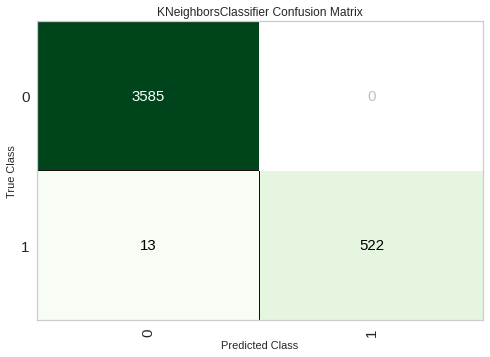

In [20]:
#Plotting confusion matrix
plot_model(tuned_knn, plot = 'confusion_matrix')

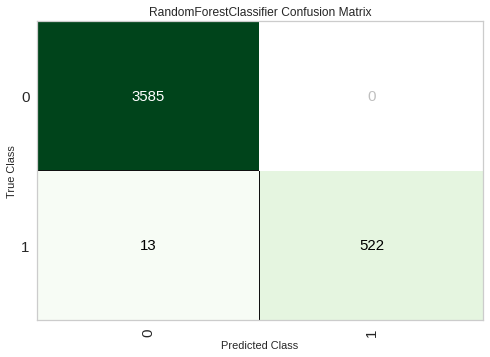

In [21]:
plot_model(tuned_rf, plot = 'confusion_matrix')

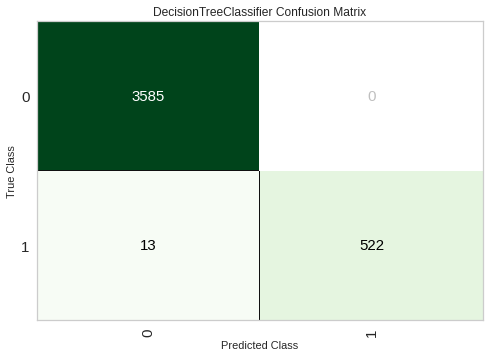

In [22]:
plot_model(tuned_dt, plot = 'confusion_matrix')

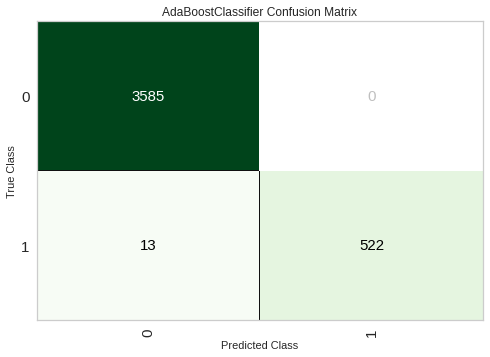

In [23]:
plot_model(tuned_ada, plot = 'confusion_matrix')

In [30]:
stacker = stack_models(estimator_list = [knn, dt, ada], meta_model = rf, method='hard')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9958,0.9998,0.9677,1.0,0.9836,0.9812
1,0.9990,0.9999,0.9919,1.0,0.9960,0.9954
2,0.9979,0.9999,0.9840,1.0,0.9919,0.9907
3,0.9969,0.9998,0.9760,1.0,0.9879,0.9861
4,0.9969,0.9998,0.9760,1.0,0.9879,0.9861
5,0.9958,0.9998,0.9680,1.0,0.9837,0.9814
6,0.9990,0.9999,0.9920,1.0,0.9960,0.9954
7,0.9948,0.9997,0.9600,1.0,0.9796,0.9766
8,0.9979,0.9999,0.9840,1.0,0.9919,0.9907
9,0.9969,0.9998,0.9760,1.0,0.9879,0.9861


In [36]:
predict_model(stacker);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Stacking Classifier,0.9968,0.9998,0.9757,1.0,0.9877,0.9859


In [0]:
final_model = finalize_model(stacker)

In [38]:
predict_model(final_model);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Stacking Classifier,0.9968,0.9998,0.9757,1.0,0.9877,0.9859


In [39]:
final_prediction = predict_model(final_model, data=pred)
final_prediction.head()

,NU_IDADE,TP_ST_CONCLUSAO,Label,Score
0,19,1,0,0.0
1,24,1,0,0.0
2,16,3,1,1.0
3,17,2,0,0.0
4,19,1,0,0.0


In [0]:
#Concatenating the answer and with NU_INSCRICAO and IN_TREINEIRO
horizontal_stack = pd.concat([df_test['NU_INSCRICAO'].reset_index(drop=True), final_prediction['Label'].reset_index(drop=True)], axis=1).rename({'NU_INSCRICAO': 'NU_INSCRICAO', 'Label': 'IN_TREINEIRO'}, axis=1)

In [52]:
horizontal_stack

,NU_INSCRICAO,IN_TREINEIRO
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,0
1,177f281c68fa032aedbd842a745da68490926cd2,0
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,1
3,5c356d810fa57671402502cd0933e5601a2ebf1e,0
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,0
...,...,...
4565,361b7fcd8867119550fe2af5aa729ffad89a7cf5,0
4566,d8a0e4c9e29494cc9bba2422bd79333931475ee1,0
4567,3f1c3388244df8d6521e983a809292d9f3bca643,0
4568,1778e9c4cef591beb6b986d191d15ed05de816b0,0


In [0]:
#Salvando arquivo para submissão
horizontal_stack.to_csv('answer.csv', index=False, sep="," , encoding="UTF8")